In [ ]:
'''
Author: ChenHJ
Date: 2022-12-13 00:12:13
LastEditors: ChenHJ
LastEditTime: 2022-12-13 00:12:31
FilePath: /0302code/CMIP_divide_SASMR_partial_plot_detrend.ipynb
Aim: 
读取并画偏回归的图
Mission: 
'''
from mailbox import _PartialFile
import numpy as np
import xarray as xr
import os
import re
from cdo import *
import shutil
import sys

sys.path.append("/home/ys17-23/chenhj/self_def/")
import plot as sepl
import cal as ca
import pandas as pd
from importlib import reload

import metpy.calc as mpcalc
import metpy.constants as constants
import geocat.comp
from windspharm.xarray import VectorWind
import skill_metrics as sm
from brokenaxes import brokenaxes

reload(sepl)

# sd.path.append("/home/ys17-23/chenhj/1201code/self_def.py")

cdo = Cdo

# for plot
import proplot as pplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter
from cartopy.mpl.ticker import LatitudeFormatter
from cartopy.util import add_cyclic_point
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy import signal
from eofs.multivariate.standard import MultivariateEof
from eofs.standard import Eof
import statsmodels.api as sm

In [ ]:
nIndia_N = 32.5
nIndia_S = 20.0
nIndia_W = 70.0
nIndia_E = 85.0

sIndia_N = 20.0
sIndia_S = 7.5
sIndia_W = 70.0
sIndia_E = 85.0

India_N = 32.5
India_S = 7.5
India_W = 70.0
India_E = 85.0

In [ ]:
NC_N = 40.0
NC_S = 32.5
NC_W = 105.0
NC_E = 120.0

## 读取数据

### 观测

In [ ]:
pre_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/pre_north_south_partial_correlation.nc")
hgt_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/hgt_north_south_partial_correlation.nc")
u_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/u_north_south_partial_correlation.nc")
v_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/v_north_south_partial_correlation.nc")
sstDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstDJF_north_south_partial_correlation.nc")
sstMAM_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstMAM_north_south_partial_correlation.nc")
sstJJA_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstJJA_north_south_partial_correlation.nc")
sstSON_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstSON_north_south_partial_correlation.nc")
sstnDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstnDJF_north_south_partial_correlation.nc")

IndR_ERA5_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_hgt_regress.nc")
IndR_ERA5_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_u_regress.nc")
IndR_ERA5_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_v_regress.nc")

In [ ]:
pre_north_south_slope = pre_north_south_partial_correlation["slope"]
hgt_north_south_slope = hgt_north_south_partial_correlation["slope"]
u_north_south_slope = u_north_south_partial_correlation["slope"]
v_north_south_slope = v_north_south_partial_correlation["slope"]
sstDJF_north_south_slope = sstDJF_north_south_partial_correlation["slope"]
sstMAM_north_south_slope = sstMAM_north_south_partial_correlation["slope"]
sstJJA_north_south_slope = sstJJA_north_south_partial_correlation["slope"]
sstSON_north_south_slope = sstSON_north_south_partial_correlation["slope"]
sstnDJF_north_south_slope = sstnDJF_north_south_partial_correlation["slope"]

pre_north_south_pvalue = pre_north_south_partial_correlation["pvalue"]
hgt_north_south_pvalue = hgt_north_south_partial_correlation["pvalue"]
u_north_south_pvalue = u_north_south_partial_correlation["pvalue"]
v_north_south_pvalue = v_north_south_partial_correlation["pvalue"]
sstDJF_north_south_pvalue = sstDJF_north_south_partial_correlation["pvalue"]
sstMAM_north_south_pvalue = sstMAM_north_south_partial_correlation["pvalue"]
sstJJA_north_south_pvalue = sstJJA_north_south_partial_correlation["pvalue"]
sstSON_north_south_pvalue = sstSON_north_south_partial_correlation["pvalue"]
sstnDJF_north_south_pvalue = sstnDJF_north_south_partial_correlation["pvalue"]

IndR_ERA5_hgt_slope = IndR_ERA5_hgt_regress["slope"]
IndR_ERA5_hgt_rvalue = IndR_ERA5_hgt_regress["rvalue"]
IndR_ERA5_hgt_pvalue = IndR_ERA5_hgt_regress["pvalue"]

IndR_ERA5_u_slope = IndR_ERA5_u_regress["slope"]
IndR_ERA5_u_rvalue = IndR_ERA5_u_regress["rvalue"]
IndR_ERA5_u_pvalue = IndR_ERA5_u_regress["pvalue"]

IndR_ERA5_v_slope = IndR_ERA5_v_regress["slope"]
IndR_ERA5_v_rvalue = IndR_ERA5_v_regress["rvalue"]
IndR_ERA5_v_pvalue = IndR_ERA5_v_regress["pvalue"]

### historical

In [ ]:
pre_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/pre_his_north_south_partial_correlation.nc")
hgt_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/hgt_his_north_south_partial_correlation.nc")
u_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/u_his_north_south_partial_correlation.nc")
v_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/v_his_north_south_partial_correlation.nc")

sstDJF_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstDJF_his_north_south_partial_correlation.nc")
sstMAM_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstMAM_his_north_south_partial_correlation.nc")
sstJJA_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstJJA_his_north_south_partial_correlation.nc")
sstSON_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstSON_his_north_south_partial_correlation.nc")
sstnDJF_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstnDJF_his_north_south_partial_correlation.nc")

IndR_his_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_pre_regress.nc")
IndR_his_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_hgt_regress.nc")
IndR_his_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_u_regress.nc")
IndR_his_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_v_regress.nc")
IndR_his_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstDJF_regress.nc")
IndR_his_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstMAM_regress.nc")
IndR_his_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstJJA_regress.nc")
IndR_his_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstSON_regress.nc")
IndR_his_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstnDJF_regress.nc")

In [ ]:
pre_his_north_south_slope = pre_his_north_south_partial_correlation["slope"]
hgt_his_north_south_slope = hgt_his_north_south_partial_correlation["slope"]
u_his_north_south_slope = u_his_north_south_partial_correlation["slope"]
v_his_north_south_slope = v_his_north_south_partial_correlation["slope"]
sstDJF_his_north_south_slope = sstDJF_his_north_south_partial_correlation["slope"]
sstMAM_his_north_south_slope = sstMAM_his_north_south_partial_correlation["slope"]
sstJJA_his_north_south_slope = sstJJA_his_north_south_partial_correlation["slope"]
sstSON_his_north_south_slope = sstSON_his_north_south_partial_correlation["slope"]
sstnDJF_his_north_south_slope = sstnDJF_his_north_south_partial_correlation["slope"]

pre_his_north_south_pvalue = pre_his_north_south_partial_correlation["pvalue"]
hgt_his_north_south_pvalue = hgt_his_north_south_partial_correlation["pvalue"]
u_his_north_south_pvalue = u_his_north_south_partial_correlation["pvalue"]
v_his_north_south_pvalue = v_his_north_south_partial_correlation["pvalue"]
sstDJF_his_north_south_pvalue = sstDJF_his_north_south_partial_correlation["pvalue"]
sstMAM_his_north_south_pvalue = sstMAM_his_north_south_partial_correlation["pvalue"]
sstJJA_his_north_south_pvalue = sstJJA_his_north_south_partial_correlation["pvalue"]
sstSON_his_north_south_pvalue = sstSON_his_north_south_partial_correlation["pvalue"]
sstnDJF_his_north_south_pvalue = sstnDJF_his_north_south_partial_correlation["pvalue"]

IndR_his_pre_slope = IndR_his_pre_regress["slope"]
IndR_his_pre_rvalue = IndR_his_pre_regress["rvalue"]
IndR_his_pre_pvalue = IndR_his_pre_regress["pvalue"]

IndR_his_hgt_slope = IndR_his_hgt_regress["slope"]
IndR_his_hgt_rvalue = IndR_his_hgt_regress["rvalue"]
IndR_his_hgt_pvalue = IndR_his_hgt_regress["pvalue"]

IndR_his_u_slope = IndR_his_u_regress["slope"]
IndR_his_u_rvalue = IndR_his_u_regress["rvalue"]
IndR_his_u_pvalue = IndR_his_u_regress["pvalue"]

IndR_his_v_slope = IndR_his_v_regress["slope"]
IndR_his_v_rvalue = IndR_his_v_regress["rvalue"]
IndR_his_v_pvalue = IndR_his_v_regress["pvalue"]
IndR_his_sstDJF_slope = IndR_his_sstDJF_regress["slope"]
IndR_his_sstDJF_rvalue = IndR_his_sstDJF_regress["rvalue"]
IndR_his_sstDJF_pvalue = IndR_his_sstDJF_regress["pvalue"]

IndR_his_sstMAM_slope = IndR_his_sstMAM_regress["slope"]
IndR_his_sstMAM_rvalue = IndR_his_sstMAM_regress["rvalue"]
IndR_his_sstMAM_pvalue = IndR_his_sstMAM_regress["pvalue"]

IndR_his_sstJJA_slope = IndR_his_sstJJA_regress["slope"]
IndR_his_sstJJA_rvalue = IndR_his_sstJJA_regress["rvalue"]
IndR_his_sstJJA_pvalue = IndR_his_sstJJA_regress["pvalue"]

IndR_his_sstSON_slope = IndR_his_sstSON_regress["slope"]
IndR_his_sstSON_rvalue = IndR_his_sstSON_regress["rvalue"]
IndR_his_sstSON_pvalue = IndR_his_sstSON_regress["pvalue"]

IndR_his_sstnDJF_slope = IndR_his_sstnDJF_regress["slope"]
IndR_his_sstnDJF_rvalue = IndR_his_sstnDJF_regress["rvalue"]
IndR_his_sstnDJF_pvalue = IndR_his_sstnDJF_regress["pvalue"]

### ssp585

In [ ]:
pre_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/pre_ssp585_p3_north_south_partial_correlation.nc")
hgt_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/hgt_ssp585_p3_north_south_partial_correlation.nc")
u_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/u_ssp585_p3_north_south_partial_correlation.nc")
v_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/v_ssp585_p3_north_south_partial_correlation.nc")

sstDJF_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstDJF_ssp585_p3_north_south_partial_correlation.nc")
sstMAM_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstMAM_ssp585_p3_north_south_partial_correlation.nc")
sstJJA_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstJJA_ssp585_p3_north_south_partial_correlation.nc")
sstSON_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstSON_ssp585_p3_north_south_partial_correlation.nc")
sstnDJF_ssp585_p3_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstnDJF_ssp585_p3_north_south_partial_correlation.nc")

IndR_ssp585_p3_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_pre_regress.nc")
IndR_ssp585_p3_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_hgt_regress.nc")
IndR_ssp585_p3_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_u_regress.nc")
IndR_ssp585_p3_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_v_regress.nc")
IndR_ssp585_p3_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_sstDJF_regress.nc")
IndR_ssp585_p3_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_sstMAM_regress.nc")
IndR_ssp585_p3_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_sstJJA_regress.nc")
IndR_ssp585_p3_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_sstSON_regress.nc")
IndR_ssp585_p3_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_ssp585_p3_sstnDJF_regress.nc")

In [ ]:
pre_ssp585_p3_north_south_slope = pre_ssp585_p3_north_south_partial_correlation["slope"]
hgt_ssp585_p3_north_south_slope = hgt_ssp585_p3_north_south_partial_correlation["slope"]
u_ssp585_p3_north_south_slope = u_ssp585_p3_north_south_partial_correlation["slope"]
v_ssp585_p3_north_south_slope = v_ssp585_p3_north_south_partial_correlation["slope"]
sstDJF_ssp585_p3_north_south_slope = sstDJF_ssp585_p3_north_south_partial_correlation["slope"]
sstMAM_ssp585_p3_north_south_slope = sstMAM_ssp585_p3_north_south_partial_correlation["slope"]
sstJJA_ssp585_p3_north_south_slope = sstJJA_ssp585_p3_north_south_partial_correlation["slope"]
sstSON_ssp585_p3_north_south_slope = sstSON_ssp585_p3_north_south_partial_correlation["slope"]
sstnDJF_ssp585_p3_north_south_slope = sstnDJF_ssp585_p3_north_south_partial_correlation["slope"]

pre_ssp585_p3_north_south_pvalue = pre_ssp585_p3_north_south_partial_correlation["pvalue"]
hgt_ssp585_p3_north_south_pvalue = hgt_ssp585_p3_north_south_partial_correlation["pvalue"]
u_ssp585_p3_north_south_pvalue = u_ssp585_p3_north_south_partial_correlation["pvalue"]
v_ssp585_p3_north_south_pvalue = v_ssp585_p3_north_south_partial_correlation["pvalue"]
sstDJF_ssp585_p3_north_south_pvalue = sstDJF_ssp585_p3_north_south_partial_correlation["pvalue"]
sstMAM_ssp585_p3_north_south_pvalue = sstMAM_ssp585_p3_north_south_partial_correlation["pvalue"]
sstJJA_ssp585_p3_north_south_pvalue = sstJJA_ssp585_p3_north_south_partial_correlation["pvalue"]
sstSON_ssp585_p3_north_south_pvalue = sstSON_ssp585_p3_north_south_partial_correlation["pvalue"]
sstnDJF_ssp585_p3_north_south_pvalue = sstnDJF_ssp585_p3_north_south_partial_correlation["pvalue"]

IndR_ssp585_p3_pre_slope = IndR_ssp585_p3_pre_regress["slope"]
IndR_ssp585_p3_pre_rvalue = IndR_ssp585_p3_pre_regress["rvalue"]
IndR_ssp585_p3_pre_pvalue = IndR_ssp585_p3_pre_regress["pvalue"]

IndR_ssp585_p3_hgt_slope = IndR_ssp585_p3_hgt_regress["slope"]
IndR_ssp585_p3_hgt_rvalue = IndR_ssp585_p3_hgt_regress["rvalue"]
IndR_ssp585_p3_hgt_pvalue = IndR_ssp585_p3_hgt_regress["pvalue"]

IndR_ssp585_p3_u_slope = IndR_ssp585_p3_u_regress["slope"]
IndR_ssp585_p3_u_rvalue = IndR_ssp585_p3_u_regress["rvalue"]
IndR_ssp585_p3_u_pvalue = IndR_ssp585_p3_u_regress["pvalue"]

IndR_ssp585_p3_v_slope = IndR_ssp585_p3_v_regress["slope"]
IndR_ssp585_p3_v_rvalue = IndR_ssp585_p3_v_regress["rvalue"]
IndR_ssp585_p3_v_pvalue = IndR_ssp585_p3_v_regress["pvalue"]
IndR_ssp585_p3_sstDJF_slope = IndR_ssp585_p3_sstDJF_regress["slope"]
IndR_ssp585_p3_sstDJF_rvalue = IndR_ssp585_p3_sstDJF_regress["rvalue"]
IndR_ssp585_p3_sstDJF_pvalue = IndR_ssp585_p3_sstDJF_regress["pvalue"]

IndR_ssp585_p3_sstMAM_slope = IndR_ssp585_p3_sstMAM_regress["slope"]
IndR_ssp585_p3_sstMAM_rvalue = IndR_ssp585_p3_sstMAM_regress["rvalue"]
IndR_ssp585_p3_sstMAM_pvalue = IndR_ssp585_p3_sstMAM_regress["pvalue"]

IndR_ssp585_p3_sstJJA_slope = IndR_ssp585_p3_sstJJA_regress["slope"]
IndR_ssp585_p3_sstJJA_rvalue = IndR_ssp585_p3_sstJJA_regress["rvalue"]
IndR_ssp585_p3_sstJJA_pvalue = IndR_ssp585_p3_sstJJA_regress["pvalue"]

IndR_ssp585_p3_sstSON_slope = IndR_ssp585_p3_sstSON_regress["slope"]
IndR_ssp585_p3_sstSON_rvalue = IndR_ssp585_p3_sstSON_regress["rvalue"]
IndR_ssp585_p3_sstSON_pvalue = IndR_ssp585_p3_sstSON_regress["pvalue"]

IndR_ssp585_p3_sstnDJF_slope = IndR_ssp585_p3_sstnDJF_regress["slope"]
IndR_ssp585_p3_sstnDJF_rvalue = IndR_ssp585_p3_sstnDJF_regress["rvalue"]
IndR_ssp585_p3_sstnDJF_pvalue = IndR_ssp585_p3_sstnDJF_regress["pvalue"]

### 计算difference

In [ ]:
pre_diff_north_south_slope = pre_ssp585_p3_north_south_slope - pre_his_north_south_slope
hgt_diff_north_south_slope = hgt_ssp585_p3_north_south_slope - hgt_his_north_south_slope
u_diff_north_south_slope = u_ssp585_p3_north_south_slope - u_his_north_south_slope
v_diff_north_south_slope = v_ssp585_p3_north_south_slope - v_his_north_south_slope

sstDJF_diff_north_south_slope = sstDJF_ssp585_p3_north_south_slope - sstDJF_his_north_south_slope
sstMAM_diff_north_south_slope = sstMAM_ssp585_p3_north_south_slope - sstMAM_his_north_south_slope
sstJJA_diff_north_south_slope = sstJJA_ssp585_p3_north_south_slope - sstJJA_his_north_south_slope
sstSON_diff_north_south_slope = sstSON_ssp585_p3_north_south_slope - sstSON_his_north_south_slope
sstnDJF_diff_north_south_slope = sstnDJF_ssp585_p3_north_south_slope - sstnDJF_his_north_south_slope

IndR_diff_pre_slope = IndR_ssp585_p3_pre_slope - IndR_his_pre_slope
IndR_diff_hgt_slope = IndR_ssp585_p3_hgt_slope - IndR_his_hgt_slope
IndR_diff_u_slope = IndR_ssp585_p3_u_slope - IndR_his_u_slope
IndR_diff_v_slope = IndR_ssp585_p3_v_slope - IndR_his_v_slope
IndR_diff_sstDJF_slope = IndR_ssp585_p3_sstDJF_slope - IndR_his_sstDJF_slope
IndR_diff_sstMAM_slope = IndR_ssp585_p3_sstMAM_slope - IndR_his_sstMAM_slope
IndR_diff_sstJJA_slope = IndR_ssp585_p3_sstJJA_slope - IndR_his_sstJJA_slope
IndR_diff_sstSON_slope = IndR_ssp585_p3_sstSON_slope - IndR_his_sstSON_slope
IndR_diff_sstnDJF_slope = IndR_ssp585_p3_sstnDJF_slope - IndR_his_sstnDJF_slope

In [ ]:
models = pre_his_north_south_slope.coords["models"]

In [ ]:
fprehis = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/detrend/pr_historical_r144x72_197901-201412.nc")
prehis_JJA = fprehis["pr"].sel(time=fprehis["time"].dt.year>=1979)
prehis_JJA.attrs["units"] = "mm/day"
prehis_JJA.attrs["standard_name"] = "precipitation"
lat = prehis_JJA.coords["lat"]
lon = prehis_JJA.coords["lon"]
# 北部
nIndia_N = 35.0
nIndia_S = 20.0
nIndia_W = 70.0
nIndia_E = 85.0
lat_nIndia_range = lat[(lat >= nIndia_S) & (lat <= nIndia_N)]
lon_nIndia_range = lon[(lon >= nIndia_W) & (lon <= nIndia_E)]

# preGPCP_nIndia_JJA = ca.cal_area_weighted_mean(preGPCP_JJA_detrend.sel(lat=lat_nIndia_range, lon=lon_nIndia_range))
prehis_nIndia_JJA = ca.cal_area_weighted_mean(prehis_JJA.sel(lat=lat_nIndia_range, lon=lon_nIndia_range))
# pressp585_p3_nIndia_JJA = ca.cal_area_weighted_mean(pressp585_p3_JJA.sel(lat=lat_nIndia_range, lon=lon_nIndia_range))

# detrend
# preGPCP_nIndia_JJA_detrend = ca.detrend_dim(preGPCP_nIndia_JJA.copy(), "time", deg=1, demean=True)
prehis_nIndia_JJA_detrend = ca.detrend_dim(prehis_nIndia_JJA.copy(), "time", deg=1, demean=True)
# pressp585_p3_nIndia_JJA_detrend = ca.detrend_dim(pressp585_p3_nIndia_JJA.copy(), "time", deg=1, demean=True)

# standardize
# preGPCP_nIndia_JJA_nor = ca.standardize(preGPCP_nIndia_JJA_detrend)
prehis_nIndia_JJA_nor = ca.standardize(prehis_nIndia_JJA_detrend)
# pressp585_p3_nIndia_JJA_nor = ca.standardize(pressp585_p3_nIndia_JJA_detrend)

# 南部
sIndia_N = 20.0
sIndia_S = 5.0
sIndia_W = 70.0
sIndia_E = 85.0
lat_sIndia_range = lat[(lat >= sIndia_S) & (lat <= sIndia_N)]
lon_sIndia_range = lon[(lon >= sIndia_W) & (lon <= sIndia_E)]

# preGPCP_sIndia_JJA = ca.cal_area_weighted_mean(preGPCP_JJA_detrend.sel(lat=lat_sIndia_range, lon=lon_sIndia_range))
prehis_sIndia_JJA = ca.cal_area_weighted_mean(prehis_JJA.sel(lat=lat_sIndia_range, lon=lon_sIndia_range))
# pressp585_p3_sIndia_JJA = ca.cal_area_weighted_mean(pressp585_p3_JJA.sel(lat=lat_sIndia_range, lon=lon_sIndia_range))

# detrend
# preGPCP_sIndia_JJA_detrend = ca.detrend_dim(preGPCP_sIndia_JJA.copy(), "time", deg=1, demean=True)
prehis_sIndia_JJA_detrend = ca.detrend_dim(prehis_sIndia_JJA.copy(), "time", deg=1, demean=True)
# pressp585_p3_sIndia_JJA_detrend = ca.detrend_dim(pressp585_p3_sIndia_JJA.copy(), "time", deg=1, demean=True)

# standardize
# preGPCP_sIndia_JJA_nor = ca.standardize(preGPCP_sIndia_JJA_detrend)
prehis_sIndia_JJA_nor = ca.standardize(prehis_sIndia_JJA_detrend)
# pressp585_p3_sIndia_JJA_nor = ca.standardize(pressp585_p3_sIndia_JJA_detrend)

# 全印度
India_N = 35.0
India_S = 5.0
India_W = 70.0
India_E = 85.0
lat_India_range = lat[(lat >= India_S) & (lat <= India_N)]
lon_India_range = lon[(lon >= India_W) & (lon <= India_E)]

# preGPCP_India_JJA = ca.cal_area_weighted_mean(preGPCP_JJA_detrend.sel(lat=lat_India_range, lon=lon_India_range))
prehis_India_JJA = ca.cal_area_weighted_mean(prehis_JJA.sel(lat=lat_India_range, lon=lon_India_range))
# pressp585_p3_India_JJA = ca.cal_area_weighted_mean(pressp585_p3_JJA.sel(lat=lat_India_range, lon=lon_India_range))

# detrend
# preGPCP_India_JJA_detrend = ca.detrend_dim(preGPCP_India_JJA.copy(), "time", deg=1, demean=True)
prehis_India_JJA_detrend = ca.detrend_dim(prehis_India_JJA.copy(), "time", deg=1, demean=True)
# pressp585_p3_India_JJA_detrend = ca.detrend_dim(pressp585_p3_India_JJA.copy(), "time", deg=1, demean=True)

# standardize
# preGPCP_India_JJA_nor = ca.standardize(preGPCP_India_JJA_detrend)
prehis_India_JJA_nor = ca.standardize(prehis_India_JJA_detrend)
# pressp585_p3_India_JJA_nor = ca.standardize(pressp585_p3_India_JJA_detrend)

## 计算Nino3.4 index并去趋势

In [ ]:
# 计算Nino3.4 index并去趋势
ssthis_nondetrend = xr.open_dataarray("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/original/non_detrend/tos_historical_r144x72_195001-201412.nc")
sstssp585_nondetrend = xr.open_dataarray("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/ssp585/tmp_var/original/non_detrend/tos_ssp585_r144x72_201501-209912.nc")

Nino34CMIP6_MAM, Nino34CMIP6_JJA, Nino34CMIP6_SON, Nino34CMIP6_DJF = ca.mon_to_season(ca.cal_area_weighted_mean(ca.filplonlat(xr.concat([ssthis_nondetrend.sel(time=ssthis_nondetrend.time.dt.year>=1979), sstssp585_nondetrend], "time")).loc[:,:,-5:5,-170:-120]))

Nino34CMIP6_MAM_detrend = ca.detrend_dim(Nino34CMIP6_MAM, "time", deg=1, demean=True)
Nino34CMIP6_JJA_detrend = ca.detrend_dim(Nino34CMIP6_JJA, "time", deg=1, demean=True)
Nino34CMIP6_SON_detrend = ca.detrend_dim(Nino34CMIP6_SON, "time", deg=1, demean=True)
Nino34CMIP6_DJF_detrend = ca.detrend_dim(Nino34CMIP6_DJF, "time", deg=1, demean=True)
Nino34his_MAM = ca.detrend_dim(Nino34CMIP6_MAM_detrend.sel(time=Nino34CMIP6_MAM_detrend.time.dt.year<=2014), "time", deg=1, demean=True)
Nino34his_JJA = ca.detrend_dim(Nino34CMIP6_JJA_detrend.sel(time=Nino34CMIP6_JJA_detrend.time.dt.year<=2014), "time", deg=1, demean=True)
Nino34his_SON = ca.detrend_dim(Nino34CMIP6_SON_detrend.sel(time=Nino34CMIP6_SON_detrend.time.dt.year<=2014), "time", deg=1, demean=True)
Nino34his_DJF = ca.detrend_dim(Nino34CMIP6_DJF_detrend.sel(time=Nino34CMIP6_DJF_detrend.time.dt.year<=2014), "time", deg=1, demean=True)

Nino34ssp585_p3_MAM = ca.detrend_dim(Nino34CMIP6_MAM_detrend.sel(time=Nino34CMIP6_MAM_detrend.time.dt.year>=2064), "time", deg=1, demean=True)
Nino34ssp585_p3_JJA = ca.detrend_dim(Nino34CMIP6_JJA_detrend.sel(time=Nino34CMIP6_JJA_detrend.time.dt.year>=2064), "time", deg=1, demean=True)
Nino34ssp585_p3_SON = ca.detrend_dim(Nino34CMIP6_SON_detrend.sel(time=Nino34CMIP6_SON_detrend.time.dt.year>=2064), "time", deg=1, demean=True)
Nino34ssp585_p3_DJF = ca.detrend_dim(Nino34CMIP6_DJF_detrend.sel(time=Nino34CMIP6_DJF_detrend.time.dt.year>=2064), "time", deg=1, demean=True)

Nino34his_MAM_nor = ca.standardize(Nino34his_MAM.copy())
Nino34his_JJA_nor = ca.standardize(Nino34his_JJA.copy())
Nino34his_SON_nor = ca.standardize(Nino34his_SON.copy())
Nino34his_DJF_nor = ca.standardize(Nino34his_DJF.copy())

Nino34ssp585_p3_MAM_nor = ca.standardize(Nino34ssp585_p3_MAM.copy())
Nino34ssp585_p3_JJA_nor = ca.standardize(Nino34ssp585_p3_JJA.copy())
Nino34ssp585_p3_SON_nor = ca.standardize(Nino34ssp585_p3_SON.copy())
Nino34ssp585_p3_DJF_nor = ca.standardize(Nino34ssp585_p3_DJF.copy())

### 计算海温和印度降水的回归

In [ ]:
nino34JJA_NSASMR_corr = ca.dim_linregress(prehis_nIndia_JJA_nor, Nino34his_JJA_nor)[2]
tmp = prehis_nIndia_JJA_nor[:,1:].copy()
tmp.coords["time"] = Nino34his_DJF_nor.time
nino34DJF_NSASMR_corr = ca.dim_linregress(tmp, Nino34his_DJF_nor)[2]

nino34JJA_SSASMR_corr = ca.dim_linregress(prehis_sIndia_JJA_nor, Nino34his_JJA_nor)[2]
tmp = prehis_sIndia_JJA_nor[:,1:].copy()
tmp.coords["time"] = Nino34his_DJF_nor.time
nino34DJF_SSASMR_corr = ca.dim_linregress(tmp, Nino34his_DJF_nor)[2]

## 集合平均

### historical

In [ ]:
hgt_his_north_south_slope_ens = hgt_his_north_south_slope.mean(dim="models",skipna=True)

u_his_north_south_slope_ens = u_his_north_south_slope.mean(dim="models",skipna=True)

v_his_north_south_slope_ens = v_his_north_south_slope.mean(dim="models",skipna=True)

pre_his_north_south_slope_ens = pre_his_north_south_slope.mean(dim="models",skipna=True)

sstDJF_his_north_south_slope_ens = sstDJF_his_north_south_slope.mean(dim="models",skipna=True)

sstMAM_his_north_south_slope_ens = sstMAM_his_north_south_slope.mean(dim="models",skipna=True)

sstJJA_his_north_south_slope_ens = sstJJA_his_north_south_slope.mean(dim="models",skipna=True)

sstSON_his_north_south_slope_ens = sstSON_his_north_south_slope.mean(dim="models",skipna=True)

sstnDJF_his_north_south_slope_ens = sstnDJF_his_north_south_slope.mean(dim="models",skipna=True)

IndR_his_pre_slope_ens = IndR_his_pre_slope.mean(dim="models",skipna=True)
IndR_his_hgt_slope_ens = IndR_his_hgt_slope.mean(dim="models",skipna=True)
IndR_his_u_slope_ens = IndR_his_u_slope.mean(dim="models",skipna=True)
IndR_his_v_slope_ens = IndR_his_v_slope.mean(dim="models",skipna=True)
IndR_his_sstDJF_slope_ens = IndR_his_sstDJF_slope.mean(dim="models",skipna=True)
IndR_his_sstMAM_slope_ens = IndR_his_sstMAM_slope.mean(dim="models",skipna=True)
IndR_his_sstJJA_slope_ens = IndR_his_sstJJA_slope.mean(dim="models",skipna=True)
IndR_his_sstSON_slope_ens = IndR_his_sstSON_slope.mean(dim="models",skipna=True)
IndR_his_sstnDJF_slope_ens = IndR_his_sstnDJF_slope.mean(dim="models",skipna=True)

### ssp585

In [ ]:
hgt_ssp585_p3_north_south_slope_ens = hgt_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

u_ssp585_p3_north_south_slope_ens = u_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

v_ssp585_p3_north_south_slope_ens = v_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

pre_ssp585_p3_north_south_slope_ens = pre_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

sstDJF_ssp585_p3_north_south_slope_ens = sstDJF_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

sstMAM_ssp585_p3_north_south_slope_ens = sstMAM_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

sstJJA_ssp585_p3_north_south_slope_ens = sstJJA_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

sstSON_ssp585_p3_north_south_slope_ens = sstSON_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

sstnDJF_ssp585_p3_north_south_slope_ens = sstnDJF_ssp585_p3_north_south_slope.mean(dim="models",skipna=True)

IndR_ssp585_p3_pre_slope_ens = IndR_ssp585_p3_pre_slope.mean(dim="models",skipna=True)
IndR_ssp585_p3_hgt_slope_ens = IndR_ssp585_p3_hgt_slope.mean(dim="models",skipna=True)
IndR_ssp585_p3_u_slope_ens = IndR_ssp585_p3_u_slope.mean(dim="models",skipna=True)
IndR_ssp585_p3_v_slope_ens = IndR_ssp585_p3_v_slope.mean(dim="models",skipna=True)
IndR_ssp585_p3_sstDJF_slope_ens = IndR_ssp585_p3_sstDJF_slope.mean(dim="models",skipna=True)
IndR_ssp585_p3_sstMAM_slope_ens = IndR_ssp585_p3_sstMAM_slope.mean(dim="models",skipna=True)
IndR_ssp585_p3_sstJJA_slope_ens = IndR_ssp585_p3_sstJJA_slope.mean(dim="models",skipna=True)
IndR_ssp585_p3_sstSON_slope_ens = IndR_ssp585_p3_sstSON_slope.mean(dim="models",skipna=True)
IndR_ssp585_p3_sstnDJF_slope_ens = IndR_ssp585_p3_sstnDJF_slope.mean(dim="models",skipna=True)

### difference

In [ ]:
pre_diff_north_south_slope_ens = pre_diff_north_south_slope.mean(dim="models",skipna=True)
hgt_diff_north_south_slope_ens = hgt_diff_north_south_slope.mean(dim="models",skipna=True)
u_diff_north_south_slope_ens = u_diff_north_south_slope.mean(dim="models",skipna=True)
v_diff_north_south_slope_ens = v_diff_north_south_slope.mean(dim="models",skipna=True)
sstDJF_diff_north_south_slope_ens = sstDJF_diff_north_south_slope.mean(dim="models",skipna=True)
sstMAM_diff_north_south_slope_ens = sstMAM_diff_north_south_slope.mean(dim="models",skipna=True)
sstJJA_diff_north_south_slope_ens = sstJJA_diff_north_south_slope.mean(dim="models",skipna=True)
sstSON_diff_north_south_slope_ens = sstSON_diff_north_south_slope.mean(dim="models",skipna=True)
sstnDJF_diff_north_south_slope_ens = sstnDJF_diff_north_south_slope.mean(dim="models",skipna=True)

IndR_diff_pre_slope_ens = IndR_diff_pre_slope.mean(dim="models",skipna=True)
IndR_diff_hgt_slope_ens = IndR_diff_hgt_slope.mean(dim="models",skipna=True)
IndR_diff_u_slope_ens = IndR_diff_u_slope.mean(dim="models",skipna=True)
IndR_diff_v_slope_ens = IndR_diff_v_slope.mean(dim="models",skipna=True)
IndR_diff_sstDJF_slope_ens = IndR_diff_sstDJF_slope.mean(dim="models",skipna=True)
IndR_diff_sstMAM_slope_ens = IndR_diff_sstMAM_slope.mean(dim="models",skipna=True)
IndR_diff_sstJJA_slope_ens = IndR_diff_sstJJA_slope.mean(dim="models",skipna=True)
IndR_diff_sstSON_slope_ens = IndR_diff_sstSON_slope.mean(dim="models",skipna=True)
IndR_diff_sstnDJF_slope_ens = IndR_diff_sstnDJF_slope.mean(dim="models",skipna=True)

## 显著性检验

### 观测

In [ ]:
wind_north_south_mask = ca.wind_check(
    xr.where(u_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(v_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(u_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(v_north_south_pvalue <= 0.05, 1.0, 0.0),
)

### historical

In [ ]:
wind_his_north_south_mask = ca.wind_check(
    xr.where(u_his_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(v_his_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(u_his_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(v_his_north_south_pvalue <= 0.05, 1.0, 0.0),
)

### historical 集合平均

In [ ]:
hgt_his_north_south_slope_ens_mask = ca.MME_mask(hgt_his_north_south_slope, big=True)
u_his_north_south_slope_ens_mask = ca.MME_mask(u_his_north_south_slope, big=True)
v_his_north_south_slope_ens_mask = ca.MME_mask(v_his_north_south_slope, big=True)
pre_his_north_south_slope_ens_mask = ca.MME_mask(pre_his_north_south_slope, big=True)
sstDJF_his_north_south_slope_ens_mask = ca.MME_mask(sstDJF_his_north_south_slope, big=True)
sstMAM_his_north_south_slope_ens_mask = ca.MME_mask(sstMAM_his_north_south_slope, big=True)
sstJJA_his_north_south_slope_ens_mask = ca.MME_mask(sstJJA_his_north_south_slope, big=True)
sstSON_his_north_south_slope_ens_mask = ca.MME_mask(sstSON_his_north_south_slope, big=True)
sstnDJF_his_north_south_slope_ens_mask = ca.MME_mask(sstnDJF_his_north_south_slope, big=True)
wind_his_north_south_ens_mask = ca.wind_check(
    xr.where(u_his_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(v_his_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(u_his_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(v_his_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
)


IndR_his_pre_slope_ens_mask = ca.MME_mask(IndR_his_pre_slope, big=True)
IndR_his_hgt_slope_ens_mask = ca.MME_mask(IndR_his_hgt_slope, big=True)
IndR_his_u_slope_ens_mask = ca.MME_mask(IndR_his_u_slope, big=True)
IndR_his_v_slope_ens_mask = ca.MME_mask(IndR_his_v_slope, big=True)
IndR_his_sstDJF_slope_ens_mask = ca.MME_mask(IndR_his_sstDJF_slope, big=True)
IndR_his_sstMAM_slope_ens_mask = ca.MME_mask(IndR_his_sstMAM_slope, big=True)
IndR_his_sstJJA_slope_ens_mask = ca.MME_mask(IndR_his_sstJJA_slope, big=True)
IndR_his_sstSON_slope_ens_mask = ca.MME_mask(IndR_his_sstSON_slope, big=True)
IndR_his_sstnDJF_slope_ens_mask = ca.MME_mask(IndR_his_sstnDJF_slope, big=True)

IndR_his_wind_ens_mask = ca.wind_check(
    xr.where(IndR_his_u_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_his_v_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_his_u_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_his_v_slope_ens_mask > 0.0, 1.0, 0.0),
)

### ssp585

In [ ]:
wind_ssp585_p3_north_south_mask = ca.wind_check(
    xr.where(u_ssp585_p3_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(v_ssp585_p3_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(u_ssp585_p3_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(v_ssp585_p3_north_south_pvalue <= 0.05, 1.0, 0.0),
)

### ssp585 集合平均

In [ ]:
hgt_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(hgt_ssp585_p3_north_south_slope, big=True)
u_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(u_ssp585_p3_north_south_slope, big=True)
v_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(v_ssp585_p3_north_south_slope, big=True)
pre_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(pre_ssp585_p3_north_south_slope, big=True)
sstDJF_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(sstDJF_ssp585_p3_north_south_slope, big=True)
sstMAM_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(sstMAM_ssp585_p3_north_south_slope, big=True)
sstJJA_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(sstJJA_ssp585_p3_north_south_slope, big=True)
sstSON_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(sstSON_ssp585_p3_north_south_slope, big=True)
sstnDJF_ssp585_p3_north_south_slope_ens_mask = ca.MME_mask(sstnDJF_ssp585_p3_north_south_slope, big=True)
wind_ssp585_p3_north_south_ens_mask = ca.wind_check(
    xr.where(u_ssp585_p3_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(v_ssp585_p3_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(u_ssp585_p3_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(v_ssp585_p3_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
)

IndR_ssp585_p3_pre_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_pre_slope, big=True)
IndR_ssp585_p3_hgt_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_hgt_slope, big=True)
IndR_ssp585_p3_u_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_u_slope, big=True)
IndR_ssp585_p3_v_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_v_slope, big=True)
IndR_ssp585_p3_sstDJF_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_sstDJF_slope, big=True)
IndR_ssp585_p3_sstMAM_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_sstMAM_slope, big=True)
IndR_ssp585_p3_sstJJA_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_sstJJA_slope, big=True)
IndR_ssp585_p3_sstSON_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_sstSON_slope, big=True)
IndR_ssp585_p3_sstnDJF_slope_ens_mask = ca.MME_mask(IndR_ssp585_p3_sstnDJF_slope, big=True)

IndR_ssp585_p3_wind_ens_mask = ca.wind_check(
    xr.where(IndR_ssp585_p3_u_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_ssp585_p3_v_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_ssp585_p3_u_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_ssp585_p3_v_slope_ens_mask > 0.0, 1.0, 0.0),
)

### difference

##### 待完成：需要使用bootstrap方法进行重抽样检验

### difference 集合平均

In [ ]:
hgt_diff_north_south_slope_ens_mask = ca.MME_mask(hgt_diff_north_south_slope, big=True)
u_diff_north_south_slope_ens_mask = ca.MME_mask(u_diff_north_south_slope, big=True)
v_diff_north_south_slope_ens_mask = ca.MME_mask(v_diff_north_south_slope, big=True)
pre_diff_north_south_slope_ens_mask = ca.MME_mask(pre_diff_north_south_slope, big=True)
sstDJF_diff_north_south_slope_ens_mask = ca.MME_mask(sstDJF_diff_north_south_slope, big=True)
sstMAM_diff_north_south_slope_ens_mask = ca.MME_mask(sstMAM_diff_north_south_slope, big=True)
sstJJA_diff_north_south_slope_ens_mask = ca.MME_mask(sstJJA_diff_north_south_slope, big=True)
sstSON_diff_north_south_slope_ens_mask = ca.MME_mask(sstSON_diff_north_south_slope, big=True)
sstnDJF_diff_north_south_slope_ens_mask = ca.MME_mask(sstnDJF_diff_north_south_slope, big=True)
wind_diff_north_south_ens_mask = ca.wind_check(
    xr.where(u_diff_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(v_diff_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(u_diff_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(v_diff_north_south_slope_ens_mask > 0.0, 1.0, 0.0),
)

IndR_diff_pre_slope_ens_mask = ca.MME_mask(IndR_diff_pre_slope, big=True)
IndR_diff_hgt_slope_ens_mask = ca.MME_mask(IndR_diff_hgt_slope, big=True)
IndR_diff_u_slope_ens_mask = ca.MME_mask(IndR_diff_u_slope, big=True)
IndR_diff_v_slope_ens_mask = ca.MME_mask(IndR_diff_v_slope, big=True)
IndR_diff_sstDJF_slope_ens_mask = ca.MME_mask(IndR_diff_sstDJF_slope, big=True)
IndR_diff_sstMAM_slope_ens_mask = ca.MME_mask(IndR_diff_sstMAM_slope, big=True)
IndR_diff_sstJJA_slope_ens_mask = ca.MME_mask(IndR_diff_sstJJA_slope, big=True)
IndR_diff_sstSON_slope_ens_mask = ca.MME_mask(IndR_diff_sstSON_slope, big=True)
IndR_diff_sstnDJF_slope_ens_mask = ca.MME_mask(IndR_diff_sstnDJF_slope, big=True)

IndR_diff_wind_ens_mask = ca.wind_check(
    xr.where(IndR_diff_u_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_diff_v_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_diff_u_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(IndR_diff_v_slope_ens_mask > 0.0, 1.0, 0.0),
)

In [ ]:
hgt_north_south_slope

## 北部路径和南部路径pcc

### 北部路径

In [ ]:
lon_ranking1_W = 50
lon_ranking1_E = 137.5
lat_ranking1_N = 47.5
lat_ranking1_S = 15.0

lat = pre_north_south_slope.lat
lon= pre_north_south_slope.lon

#   for 200hPa
lat_ranking_range1 = lat[(lat>=lat_ranking1_S) & (lat<=lat_ranking1_N)]
lon_ranking_range1 = lon[(lon>=lon_ranking1_W) & (lon<=lon_ranking1_E)]
IndR_200hgt_pcc = []
IndR_200hgt_RMSE = []
IndR_200hgt_std = []

for num_mod, mod in enumerate(models):
    
    hgt200_pcc = ca.cal_pcc(hgt_north_south_slope[0,:,:,:].sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0), hgt_his_north_south_slope[0,:,:,:,:].sel(models=mod, lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0))
    
    IndR_200hgt_pcc.append(hgt200_pcc)

    IndR_200hgt_RMSE.append(np.sqrt(np.power((hgt_his_north_south_slope[0,:,:,:,:].sel(models=mod,lat=lat_ranking_range1,lon=lon_ranking_range1, level=200.0)-hgt_north_south_slope[0,:,:,:].sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0)),2).mean(dim=["lat","lon"],skipna=True).data))
    
    IndR_200hgt_std.append(float((hgt_his_north_south_slope[0,:,:,:,:].sel(models=mod,lat=lat_ranking_range1,lon=lon_ranking_range1, level=200.0).std(dim=["lat","lon"],skipna=True)/hgt_north_south_slope[0,:,:,:].sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0).std(dim=["lat","lon"],skipna=True)).data))


### 南部路径

In [ ]:
lon_ranking2_W = 110
lon_ranking2_E = 137.5
lat_ranking2_N = 37.5
lat_ranking2_S = 15.0
#   for 850hPa
lat_ranking_range2 = lat[(lat>=lat_ranking2_S) & (lat<=lat_ranking2_N)]
lon_ranking_range2 = lon[(lon>=lon_ranking2_W) & (lon<=lon_ranking2_E)]
IndR_850hgt_pcc = []
IndR_850hgt_RMSE = []
IndR_850hgt_std = []

for num_mod, mod in enumerate(models):
    
    hgt850_pcc = ca.cal_pcc(hgt_north_south_slope[1,:,:,:].sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0), hgt_his_north_south_slope[1,:,:,:,:].sel(models=mod, lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0))
    
    IndR_850hgt_pcc.append(hgt850_pcc)
    IndR_850hgt_RMSE.append(np.sqrt(np.power((hgt_his_north_south_slope[1,:,:,:,:].sel(models=mod,lat=lat_ranking_range2,lon=lon_ranking_range2, level=850.0)-hgt_north_south_slope[1,:,:,:].sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0)),2).mean(dim=["lat","lon"],skipna=True).data))
    
    IndR_850hgt_std.append(float((hgt_his_north_south_slope[1,:,:,:,:].sel(models=mod,lat=lat_ranking_range2,lon=lon_ranking_range2, level=850.0).std(dim=["lat","lon"],skipna=True)/hgt_north_south_slope[1,:,:,:].sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0).std(dim=["lat","lon"],skipna=True)).data))

### 对EOF合成结果的pcc

#### 读取EOF合成pattern

In [ ]:
hgt_pos_obs_EOF1_comp = xr.open_dataarray("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/hgt_pos_obs_EOF1_comp")
hgt_neg_obs_EOF1_comp = xr.open_dataarray("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/hgt_neg_obs_EOF1_comp")
hgt_pos_obs_EOF2_comp = xr.open_dataarray("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/hgt_pos_obs_EOF2_comp")
hgt_neg_obs_EOF2_comp = xr.open_dataarray("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/hgt_neg_obs_EOF2_comp")
hgt_pos_his_EOF1_comp = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/pos_his_EOF1_composite.nc")["hgt"]
hgt_neg_his_EOF1_comp = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/neg_his_EOF1_composite.nc")["hgt"]
hgt_pos_his_EOF2_comp = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/pos_his_EOF2_composite.nc")["hgt"]
hgt_neg_his_EOF2_comp = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/neg_his_EOF2_composite.nc")["hgt"]

In [ ]:
hgt_pos_his_EOF1_comp

#### 第一模态正位相

In [ ]:
#   for 200hPa
IndR_EOF1_pos_pcc = []
IndR_EOF1_pos_RMSE = []
IndR_EOF1_pos_std = []

for num_mod, mod in enumerate(models):
    
    EOF1_pos_pcc = ca.cal_pcc(hgt_pos_obs_EOF1_comp.sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0), hgt_pos_his_EOF1_comp.sel(models=mod, lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0))
    
    IndR_EOF1_pos_pcc.append(EOF1_pos_pcc)

    IndR_EOF1_pos_RMSE.append(np.sqrt(np.power((hgt_pos_his_EOF1_comp.sel(models=mod,lat=lat_ranking_range1,lon=lon_ranking_range1, level=200.0)-hgt_pos_obs_EOF1_comp.sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0)),2).mean(dim=["lat","lon"],skipna=True).data))
    
    IndR_EOF1_pos_std.append(float((hgt_pos_his_EOF1_comp.sel(models=mod,lat=lat_ranking_range1,lon=lon_ranking_range1, level=200.0).std(dim=["lat","lon"],skipna=True)/hgt_pos_obs_EOF1_comp.sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0).std(dim=["lat","lon"],skipna=True)).data))

#### 第二模态负位相

In [ ]:
#   for 200hPa
IndR_EOF2_neg_pcc = []
IndR_EOF2_neg_RMSE = []
IndR_EOF2_neg_std = []

for num_mod, mod in enumerate(models):
    
    EOF2_neg_pcc = ca.cal_pcc(hgt_neg_obs_EOF2_comp.sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0), hgt_neg_his_EOF2_comp.sel(models=mod, lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0))
    
    IndR_EOF2_neg_pcc.append(EOF2_neg_pcc)

    IndR_EOF2_neg_RMSE.append(np.sqrt(np.power((hgt_neg_his_EOF2_comp.sel(models=mod,lat=lat_ranking_range1,lon=lon_ranking_range1, level=200.0)-hgt_neg_obs_EOF2_comp.sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0)),2).mean(dim=["lat","lon"],skipna=True).data))
    
    IndR_EOF2_neg_std.append(float((hgt_neg_his_EOF2_comp.sel(models=mod,lat=lat_ranking_range1,lon=lon_ranking_range1, level=200.0).std(dim=["lat","lon"],skipna=True)/hgt_neg_obs_EOF2_comp.sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0).std(dim=["lat","lon"],skipna=True)).data))

#### 第一模态负相位

In [ ]:
IndR_EOF1_neg_pcc = []
IndR_EOF1_neg_RMSE = []
IndR_EOF1_neg_std = []

for num_mod, mod in enumerate(models):
    
    EOF1_neg_pcc = ca.cal_pcc(hgt_neg_obs_EOF1_comp.sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0), hgt_neg_his_EOF1_comp.sel(models=mod, lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0))
    
    IndR_EOF1_neg_pcc.append(EOF1_neg_pcc)
    IndR_EOF1_neg_RMSE.append(np.sqrt(np.power((hgt_neg_his_EOF1_comp.sel(models=mod,lat=lat_ranking_range2,lon=lon_ranking_range2, level=850.0)-hgt_neg_obs_EOF1_comp.sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0)),2).mean(dim=["lat","lon"],skipna=True).data))
    
    IndR_EOF1_neg_std.append(float((hgt_neg_his_EOF1_comp.sel(models=mod,lat=lat_ranking_range2,lon=lon_ranking_range2, level=850.0).std(dim=["lat","lon"],skipna=True)/hgt_neg_obs_EOF1_comp.sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0).std(dim=["lat","lon"],skipna=True)).data))

#### 第二模态正相位

In [ ]:
IndR_EOF2_pos_pcc = []
IndR_EOF2_pos_RMSE = []
IndR_EOF2_pos_std = []

for num_mod, mod in enumerate(models):
    
    EOF2_pos_pcc = ca.cal_pcc(hgt_pos_obs_EOF2_comp.sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0), hgt_pos_his_EOF2_comp.sel(models=mod, lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0))
    
    IndR_EOF2_pos_pcc.append(EOF2_pos_pcc)
    IndR_EOF2_pos_RMSE.append(np.sqrt(np.power((hgt_pos_his_EOF2_comp.sel(models=mod,lat=lat_ranking_range2,lon=lon_ranking_range2, level=850.0)-hgt_pos_obs_EOF2_comp.sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0)),2).mean(dim=["lat","lon"],skipna=True).data))
    
    IndR_EOF2_pos_std.append(float((hgt_pos_his_EOF2_comp.sel(models=mod,lat=lat_ranking_range2,lon=lon_ranking_range2, level=850.0).std(dim=["lat","lon"],skipna=True)/hgt_pos_obs_EOF2_comp.sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0).std(dim=["lat","lon"],skipna=True)).data))

## 画图部分

### fig.1 降水

#### ensemble

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_pre_north_south_ens = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_pre_north_south_ens.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 140.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for ax in axs[:,0]:
    # India
    x0 = India_W
    y0 = India_S
    width = India_E-India_W
    height = India_N-India_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
# ===================================================
for ax in axs[:,1]:
    # northern India
    x0 = nIndia_W
    y0 = nIndia_S
    width = nIndia_E-nIndia_W
    height = nIndia_N-nIndia_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
# ===================================================
for ax in axs[:,2]:
    # northern India
    x0 = sIndia_W
    y0 = sIndia_S
    width = sIndia_E-sIndia_W
    height = sIndia_N-sIndia_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
# ===================================================
# ensemble
con = axs[0,0].contourf(
    IndR_his_pre_slope_ens,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both"
    )
sepl.plt_sig(
    IndR_his_pre_slope_ens, axs[0,0], n, np.where(IndR_his_pre_slope_ens_mask[::n, ::n] > 0.0), "bright purple", 12.0,
)

axs[0,0].format(
    ltitle="1979-2014 ens", rtitle="SASMR",
)
# ===================================================
con = axs[1,0].contourf(
    IndR_ssp585_p3_pre_slope_ens,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both"
    )
sepl.plt_sig(
    IndR_ssp585_p3_pre_slope_ens, axs[1,0], n, np.where(IndR_ssp585_p3_pre_slope_ens_mask[::n, ::n] > 0.0), "bright purple", 12.0,
)

axs[1,0].format(
    ltitle="2064-2099 ens", rtitle="SASMR",
)
# ===================================================
# difference
con = axs[2,0].contourf(
    IndR_diff_pre_slope_ens,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both"
    )
sepl.plt_sig(
    IndR_diff_pre_slope_ens, axs[2,0], n, np.where(IndR_diff_pre_slope_ens_mask[::n, ::n] > 0.0), "bright purple", 12.0,
)

axs[2,0].format(
    ltitle="diff ens", rtitle="SASMR",
)
# ===================================================
for num_area, area in enumerate(["northern SASMR", "southern SASMR"]):
  con = axs[0,num_area+1].contourf(
      pre_his_north_south_slope_ens[num_area,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_his_north_south_slope_ens[num_area,:,:], axs[0,num_area+1], n, np.where(pre_his_north_south_slope_ens_mask[num_area,:,:][::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[0,num_area+1].format(
      ltitle="1979-2014 ens", rtitle=area,
  )
  # ===================================================
  con = axs[1,num_area+1].contourf(
      pre_ssp585_p3_north_south_slope_ens[num_area,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_ssp585_p3_north_south_slope_ens[num_area,:,:], axs[1,num_area+1], n, np.where(pre_ssp585_p3_north_south_slope_ens_mask[num_area,:,:][::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[1,num_area+1].format(
      ltitle="2064-2099 ens", rtitle=area,
  )
  # ===================================================
  con = axs[2,num_area+1].contourf(
      pre_diff_north_south_slope_ens[num_area,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_diff_north_south_slope_ens[num_area,:,:], axs[2,num_area+1], n, np.where(pre_diff_north_south_slope_ens_mask[num_area,:,:][::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[2,num_area+1].format(
      ltitle="diff ens", rtitle=area,
  )
  # ===================================================
cb = fig_pre_north_south_ens.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-2.0,2.1, 0.4))
axs.format(linewidth=1.2)
fig_pre_north_south_ens.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

### fig.2 环流

#### historical ensemble

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_cir_north_south_his_ens = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_cir_north_south_his_ens.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    con = axs[num_lev, 0].contourf(
        IndR_his_hgt_slope_ens.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        IndR_his_hgt_slope_ens.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_his_hgt_slope_ens_mask.sel(level=lev)[::n, ::n] > 0.0), "bright purple", 19.0,
    )
    # axs[num_lev, 0].quiver(
    #     IndRAIR_his_u_slope.sel(level=lev)[::ski, ::ski],
    #     IndRAIR_his_v_slope.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 0].quiver(
        IndR_his_u_slope_ens.sel(level=lev).where(IndR_his_wind_ens_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        IndR_his_v_slope_ens.sel(level=lev).where(IndR_his_wind_ens_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 0].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 0].format(
        ltitle="1979-2014 {:.0f} hPa ens".format(lev), rtitle="SASMR",
    )
    # ======================================
    for num_area, area in enumerate(["northern SASMR", "southern SASMR"]):
      con = axs[num_lev, num_area+1].contourf(
          hgt_his_north_south_slope_ens.sel(level=lev)[num_area,:,:],
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          hgt_his_north_south_slope_ens.sel(level=lev)[num_area,:,:], axs[num_lev, num_area+1], n, np.where(hgt_his_north_south_slope_ens_mask.sel(level=lev)[num_area,::n,::n] > 0.0), "bright purple", 19.0,
      )
      # axs[num_lev, num_area+1].quiver(
      #     IndR_his_u_slope_ens.sel(level=lev)[::ski, ::ski],
      #     IndR_his_v_slope_ens.sel(level=lev)[::ski, ::ski],
      #     zorder=1.1,
      #     headwidth=2.6,
      #     headlength=2.3,
      #     headaxislength=2.3,
      #     scale_units="xy",
      #     scale=scalelevel[num_lev],
      #     pivot="mid",
      #     color="grey6",
      # )

      m = axs[num_lev, num_area+1].quiver(
          u_his_north_south_slope_ens.sel(level=lev).where(wind_his_north_south_ens_mask.sel(level=lev) > 0.0)[num_area,::ski,::ski],
          v_his_north_south_slope_ens.sel(level=lev).where(wind_his_north_south_ens_mask.sel(level=lev) > 0.0)[num_area,::ski,::ski],
          zorder=1.1,
          headwidth=2.6,
          headlength=2.3,
          headaxislength=2.3,
          minlength=0.5,
          width=0.004,
          scale_units="xy",
          scale=scalelevel[num_lev],
          pivot="mid",
          color="black",
      )

      qk = axs[num_lev, num_area+1].quiverkey(
          m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
      )
      axs[num_lev, num_area+1].format(
          ltitle="1979-2014 {:.0f} hPa ens".format(lev), rtitle=area,
      )
    # ======================================
    cb = axs[num_lev, 2].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
    # cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_cir_north_south_his_ens.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

#### ssp585 ensemble

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_cir_north_south_ssp585_p3_ens = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_cir_north_south_ssp585_p3_ens.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    con = axs[num_lev, 0].contourf(
        IndR_ssp585_p3_hgt_slope_ens.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        IndR_ssp585_p3_hgt_slope_ens.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_ssp585_p3_hgt_slope_ens_mask.sel(level=lev)[::n, ::n] > 0.0), "bright purple", 19.0,
    )
    # axs[num_lev, 0].quiver(
    #     IndRAIR_ssp585_p3_u_slope.sel(level=lev)[::ski, ::ski],
    #     IndRAIR_ssp585_p3_v_slope.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 0].quiver(
        IndR_ssp585_p3_u_slope_ens.sel(level=lev).where(IndR_ssp585_p3_wind_ens_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        IndR_ssp585_p3_v_slope_ens.sel(level=lev).where(IndR_ssp585_p3_wind_ens_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 0].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 0].format(
        ltitle="2064-2099 {:.0f} hPa ens".format(lev), rtitle="SASMR",
    )
    # ======================================
    for num_area, area in enumerate(["northern SASMR", "southern SASMR"]):
      con = axs[num_lev, num_area+1].contourf(
          hgt_ssp585_p3_north_south_slope_ens.sel(level=lev)[num_area,:,:],
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          hgt_ssp585_p3_north_south_slope_ens.sel(level=lev)[num_area,:,:], axs[num_lev, num_area+1], n, np.where(hgt_ssp585_p3_north_south_slope_ens_mask.sel(level=lev)[num_area,::n,::n] > 0.0), "bright purple", 19.0,
      )
      # axs[num_lev, num_area+1].quiver(
      #     IndR_ssp585_p3_u_slope_ens.sel(level=lev)[::ski, ::ski],
      #     IndR_ssp585_p3_v_slope_ens.sel(level=lev)[::ski, ::ski],
      #     zorder=1.1,
      #     headwidth=2.6,
      #     headlength=2.3,
      #     headaxislength=2.3,
      #     scale_units="xy",
      #     scale=scalelevel[num_lev],
      #     pivot="mid",
      #     color="grey6",
      # )

      m = axs[num_lev, num_area+1].quiver(
          u_ssp585_p3_north_south_slope_ens.sel(level=lev).where(wind_ssp585_p3_north_south_ens_mask.sel(level=lev) > 0.0)[num_area,::ski,::ski],
          v_ssp585_p3_north_south_slope_ens.sel(level=lev).where(wind_ssp585_p3_north_south_ens_mask.sel(level=lev) > 0.0)[num_area,::ski,::ski],
          zorder=1.1,
          headwidth=2.6,
          headlength=2.3,
          headaxislength=2.3,
          minlength=0.5,
          width=0.004,
          scale_units="xy",
          scale=scalelevel[num_lev],
          pivot="mid",
          color="black",
      )

      qk = axs[num_lev, num_area+1].quiverkey(
          m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
      )
      axs[num_lev, num_area+1].format(
          ltitle="2064-2099 {:.0f} hPa ens".format(lev), rtitle=area,
      )
    # ======================================
    cb = axs[num_lev, 2].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
    # cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_cir_north_south_ssp585_p3_ens.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

#### diff ensemble

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_cir_north_south_diff_ens = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_cir_north_south_diff_ens.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    con = axs[num_lev, 0].contourf(
        IndR_diff_hgt_slope_ens.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        IndR_diff_hgt_slope_ens.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_diff_hgt_slope_ens_mask.sel(level=lev)[::n, ::n] > 0.0), "bright purple", 19.0,
    )
    # axs[num_lev, 0].quiver(
    #     IndRAIR_diff_u_slope.sel(level=lev)[::ski, ::ski],
    #     IndRAIR_diff_v_slope.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 0].quiver(
        IndR_diff_u_slope_ens.sel(level=lev).where(IndR_diff_wind_ens_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        IndR_diff_v_slope_ens.sel(level=lev).where(IndR_diff_wind_ens_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 0].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 0].format(
        ltitle="diff {:.0f} hPa ens".format(lev), rtitle="SASMR",
    )
    # ======================================
    for num_area, area in enumerate(["northern SASMR", "southern SASMR"]):
      con = axs[num_lev, num_area+1].contourf(
          hgt_diff_north_south_slope_ens.sel(level=lev)[num_area,:,:],
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          hgt_diff_north_south_slope_ens.sel(level=lev)[num_area,:,:], axs[num_lev, num_area+1], n, np.where(hgt_diff_north_south_slope_ens_mask.sel(level=lev)[num_area,::n,::n] > 0.0), "bright purple", 19.0,
      )
      # axs[num_lev, num_area+1].quiver(
      #     IndR_diff_u_slope_ens.sel(level=lev)[::ski, ::ski],
      #     IndR_diff_v_slope_ens.sel(level=lev)[::ski, ::ski],
      #     zorder=1.1,
      #     headwidth=2.6,
      #     headlength=2.3,
      #     headaxislength=2.3,
      #     scale_units="xy",
      #     scale=scalelevel[num_lev],
      #     pivot="mid",
      #     color="grey6",
      # )

      m = axs[num_lev, num_area+1].quiver(
          u_diff_north_south_slope_ens.sel(level=lev).where(wind_diff_north_south_ens_mask.sel(level=lev) > 0.0)[num_area,::ski,::ski],
          v_diff_north_south_slope_ens.sel(level=lev).where(wind_diff_north_south_ens_mask.sel(level=lev) > 0.0)[num_area,::ski,::ski],
          zorder=1.1,
          headwidth=2.6,
          headlength=2.3,
          headaxislength=2.3,
          minlength=0.5,
          width=0.004,
          scale_units="xy",
          scale=scalelevel[num_lev],
          pivot="mid",
          color="black",
      )

      qk = axs[num_lev, num_area+1].quiverkey(
          m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
      )
      axs[num_lev, num_area+1].format(
          ltitle="diff {:.0f} hPa ens".format(lev), rtitle=area,
      )
    # ======================================
    cb = axs[num_lev, 2].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
    # cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_cir_north_south_diff_ens.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### fig.3 海温

#### historical ensemble

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_sst_north_south_his_ens = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_sst_north_south_his_ens.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [IndR_his_sstDJF_slope_ens, 
        IndR_his_sstMAM_slope_ens, 
        IndR_his_sstJJA_slope_ens, 
        IndR_his_sstSON_slope_ens, 
        IndR_his_sstnDJF_slope_ens], 
      [IndR_his_sstDJF_slope_ens_mask, 
        IndR_his_sstMAM_slope_ens_mask, 
        IndR_his_sstJJA_slope_ens_mask, 
        IndR_his_sstSON_slope_ens_mask, 
        IndR_his_sstnDJF_slope_ens_mask]):
  con = axs[i, 0].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 0], n, np.where(plot_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
  )

  axs[i, 0].format(
      ltitle="1979-2014 {} ens".format(season), rtitle="SASMR",
  )
# ======================================
for num_area, area in enumerate(["northern SASMR", "southern SASMR"]):
  for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
        [sstDJF_his_north_south_slope_ens, 
        sstMAM_his_north_south_slope_ens, 
        sstJJA_his_north_south_slope_ens, 
        sstSON_his_north_south_slope_ens, 
        sstnDJF_his_north_south_slope_ens], 
        [sstDJF_his_north_south_slope_ens_mask, 
        sstMAM_his_north_south_slope_ens_mask, 
        sstJJA_his_north_south_slope_ens_mask, 
        sstSON_his_north_south_slope_ens_mask, 
        sstnDJF_his_north_south_slope_ens_mask]):
    con = axs[i, num_area+1].contourf(
        plot_slope[num_area,:,:],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        plot_slope[num_area,:,:], axs[i, num_area+1], n, np.where(plot_pvalue[num_area,::n,::n] > 0.0), "bright purple", 3.0,
    )

    axs[i, num_area+1].format(
        ltitle="1979-2014 {} ens".format(season), rtitle=area,
    )
# ======================================
cb = fig_sst_north_south_his_ens.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_sst_north_south_his_ens.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

#### ssp585 ensemble

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_sst_north_south_ssp585_p3_ens = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_sst_north_south_ssp585_p3_ens.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [IndR_ssp585_p3_sstDJF_slope_ens, 
        IndR_ssp585_p3_sstMAM_slope_ens, 
        IndR_ssp585_p3_sstJJA_slope_ens, 
        IndR_ssp585_p3_sstSON_slope_ens, 
        IndR_ssp585_p3_sstnDJF_slope_ens], 
      [IndR_ssp585_p3_sstDJF_slope_ens_mask, 
        IndR_ssp585_p3_sstMAM_slope_ens_mask, 
        IndR_ssp585_p3_sstJJA_slope_ens_mask, 
        IndR_ssp585_p3_sstSON_slope_ens_mask, 
        IndR_ssp585_p3_sstnDJF_slope_ens_mask]):
  con = axs[i, 0].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 0], n, np.where(plot_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
  )

  axs[i, 0].format(
      ltitle="2064-2099 {} ens".format(season), rtitle="SASMR",
  )
# ======================================
for num_area, area in enumerate(["northern SASMR", "southern SASMR"]):
  for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
        [sstDJF_ssp585_p3_north_south_slope_ens, 
        sstMAM_ssp585_p3_north_south_slope_ens, 
        sstJJA_ssp585_p3_north_south_slope_ens, 
        sstSON_ssp585_p3_north_south_slope_ens, 
        sstnDJF_ssp585_p3_north_south_slope_ens], 
        [sstDJF_ssp585_p3_north_south_slope_ens_mask, 
        sstMAM_ssp585_p3_north_south_slope_ens_mask, 
        sstJJA_ssp585_p3_north_south_slope_ens_mask, 
        sstSON_ssp585_p3_north_south_slope_ens_mask, 
        sstnDJF_ssp585_p3_north_south_slope_ens_mask]):
    con = axs[i, num_area+1].contourf(
        plot_slope[num_area,:,:],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        plot_slope[num_area,:,:], axs[i, num_area+1], n, np.where(plot_pvalue[num_area,::n,::n] > 0.0), "bright purple", 3.0,
    )

    axs[i, num_area+1].format(
        ltitle="2064-2099 {} ens".format(season), rtitle=area,
    )
# ======================================
cb = fig_sst_north_south_ssp585_p3_ens.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_sst_north_south_ssp585_p3_ens.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

#### diff ensemble

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_sst_north_south_diff_ens = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_sst_north_south_diff_ens.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [IndR_diff_sstDJF_slope_ens, 
        IndR_diff_sstMAM_slope_ens, 
        IndR_diff_sstJJA_slope_ens, 
        IndR_diff_sstSON_slope_ens, 
        IndR_diff_sstnDJF_slope_ens], 
      [IndR_diff_sstDJF_slope_ens_mask, 
        IndR_diff_sstMAM_slope_ens_mask, 
        IndR_diff_sstJJA_slope_ens_mask, 
        IndR_diff_sstSON_slope_ens_mask, 
        IndR_diff_sstnDJF_slope_ens_mask]):
  con = axs[i, 0].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 0], n, np.where(plot_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
  )

  axs[i, 0].format(
      ltitle="diff {} ens".format(season), rtitle="SASMR",
  )
# ======================================
for num_area, area in enumerate(["northern SASMR", "southern SASMR"]):
  for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
        [sstDJF_diff_north_south_slope_ens, 
        sstMAM_diff_north_south_slope_ens, 
        sstJJA_diff_north_south_slope_ens, 
        sstSON_diff_north_south_slope_ens, 
        sstnDJF_diff_north_south_slope_ens], 
        [sstDJF_diff_north_south_slope_ens_mask, 
        sstMAM_diff_north_south_slope_ens_mask, 
        sstJJA_diff_north_south_slope_ens_mask, 
        sstSON_diff_north_south_slope_ens_mask, 
        sstnDJF_diff_north_south_slope_ens_mask]):
    con = axs[i, num_area+1].contourf(
        plot_slope[num_area,:,:],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        plot_slope[num_area,:,:], axs[i, num_area+1], n, np.where(plot_pvalue[num_area,::n,::n] > 0.0), "bright purple", 3.0,
    )

    axs[i, num_area+1].format(
        ltitle="diff {} ens".format(season), rtitle=area,
    )
# ======================================
cb = fig_sst_north_south_diff_ens.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_sst_north_south_diff_ens.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

### fig. 4 PCC

In [ ]:
labels = list(models.data)
# labels.append("MME")
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#绘图
fig_pcc_north_south_his=plt.figure(figsize=(13,8),dpi=300, facecolor="white")
plt.rc('font',size=15)
# plt.rcParams["axes.facecolor"] = "white"

#调用函数
ax1=fig_pcc_north_south_his.add_subplot(111,projection='polar')
box = ax1.get_position()
ax1.set_position([0, box.y0, box.width*1.2, box.height])
# ax1.text(0.6,0.1,'(a)',fontsize=15)
# tar(ax1,np.array(IndR_EAM_pcc),np.array(IndR_EAM_std),labels)
sepl.taylor_diagram(ax1,np.array(IndR_200hgt_pcc),np.array(IndR_200hgt_std), dotlables=labels, lables=True, color="r")
sepl.taylor_diagram(ax1,np.array(IndR_850hgt_pcc),np.array(IndR_850hgt_std), color="b")
plt.legend(loc="center left", bbox_to_anchor=(1.1,0.5), ncol=2, frameon=True, numpoints=1, handlelength=0)

### fig. 5 北部、南部路径PCC scatter

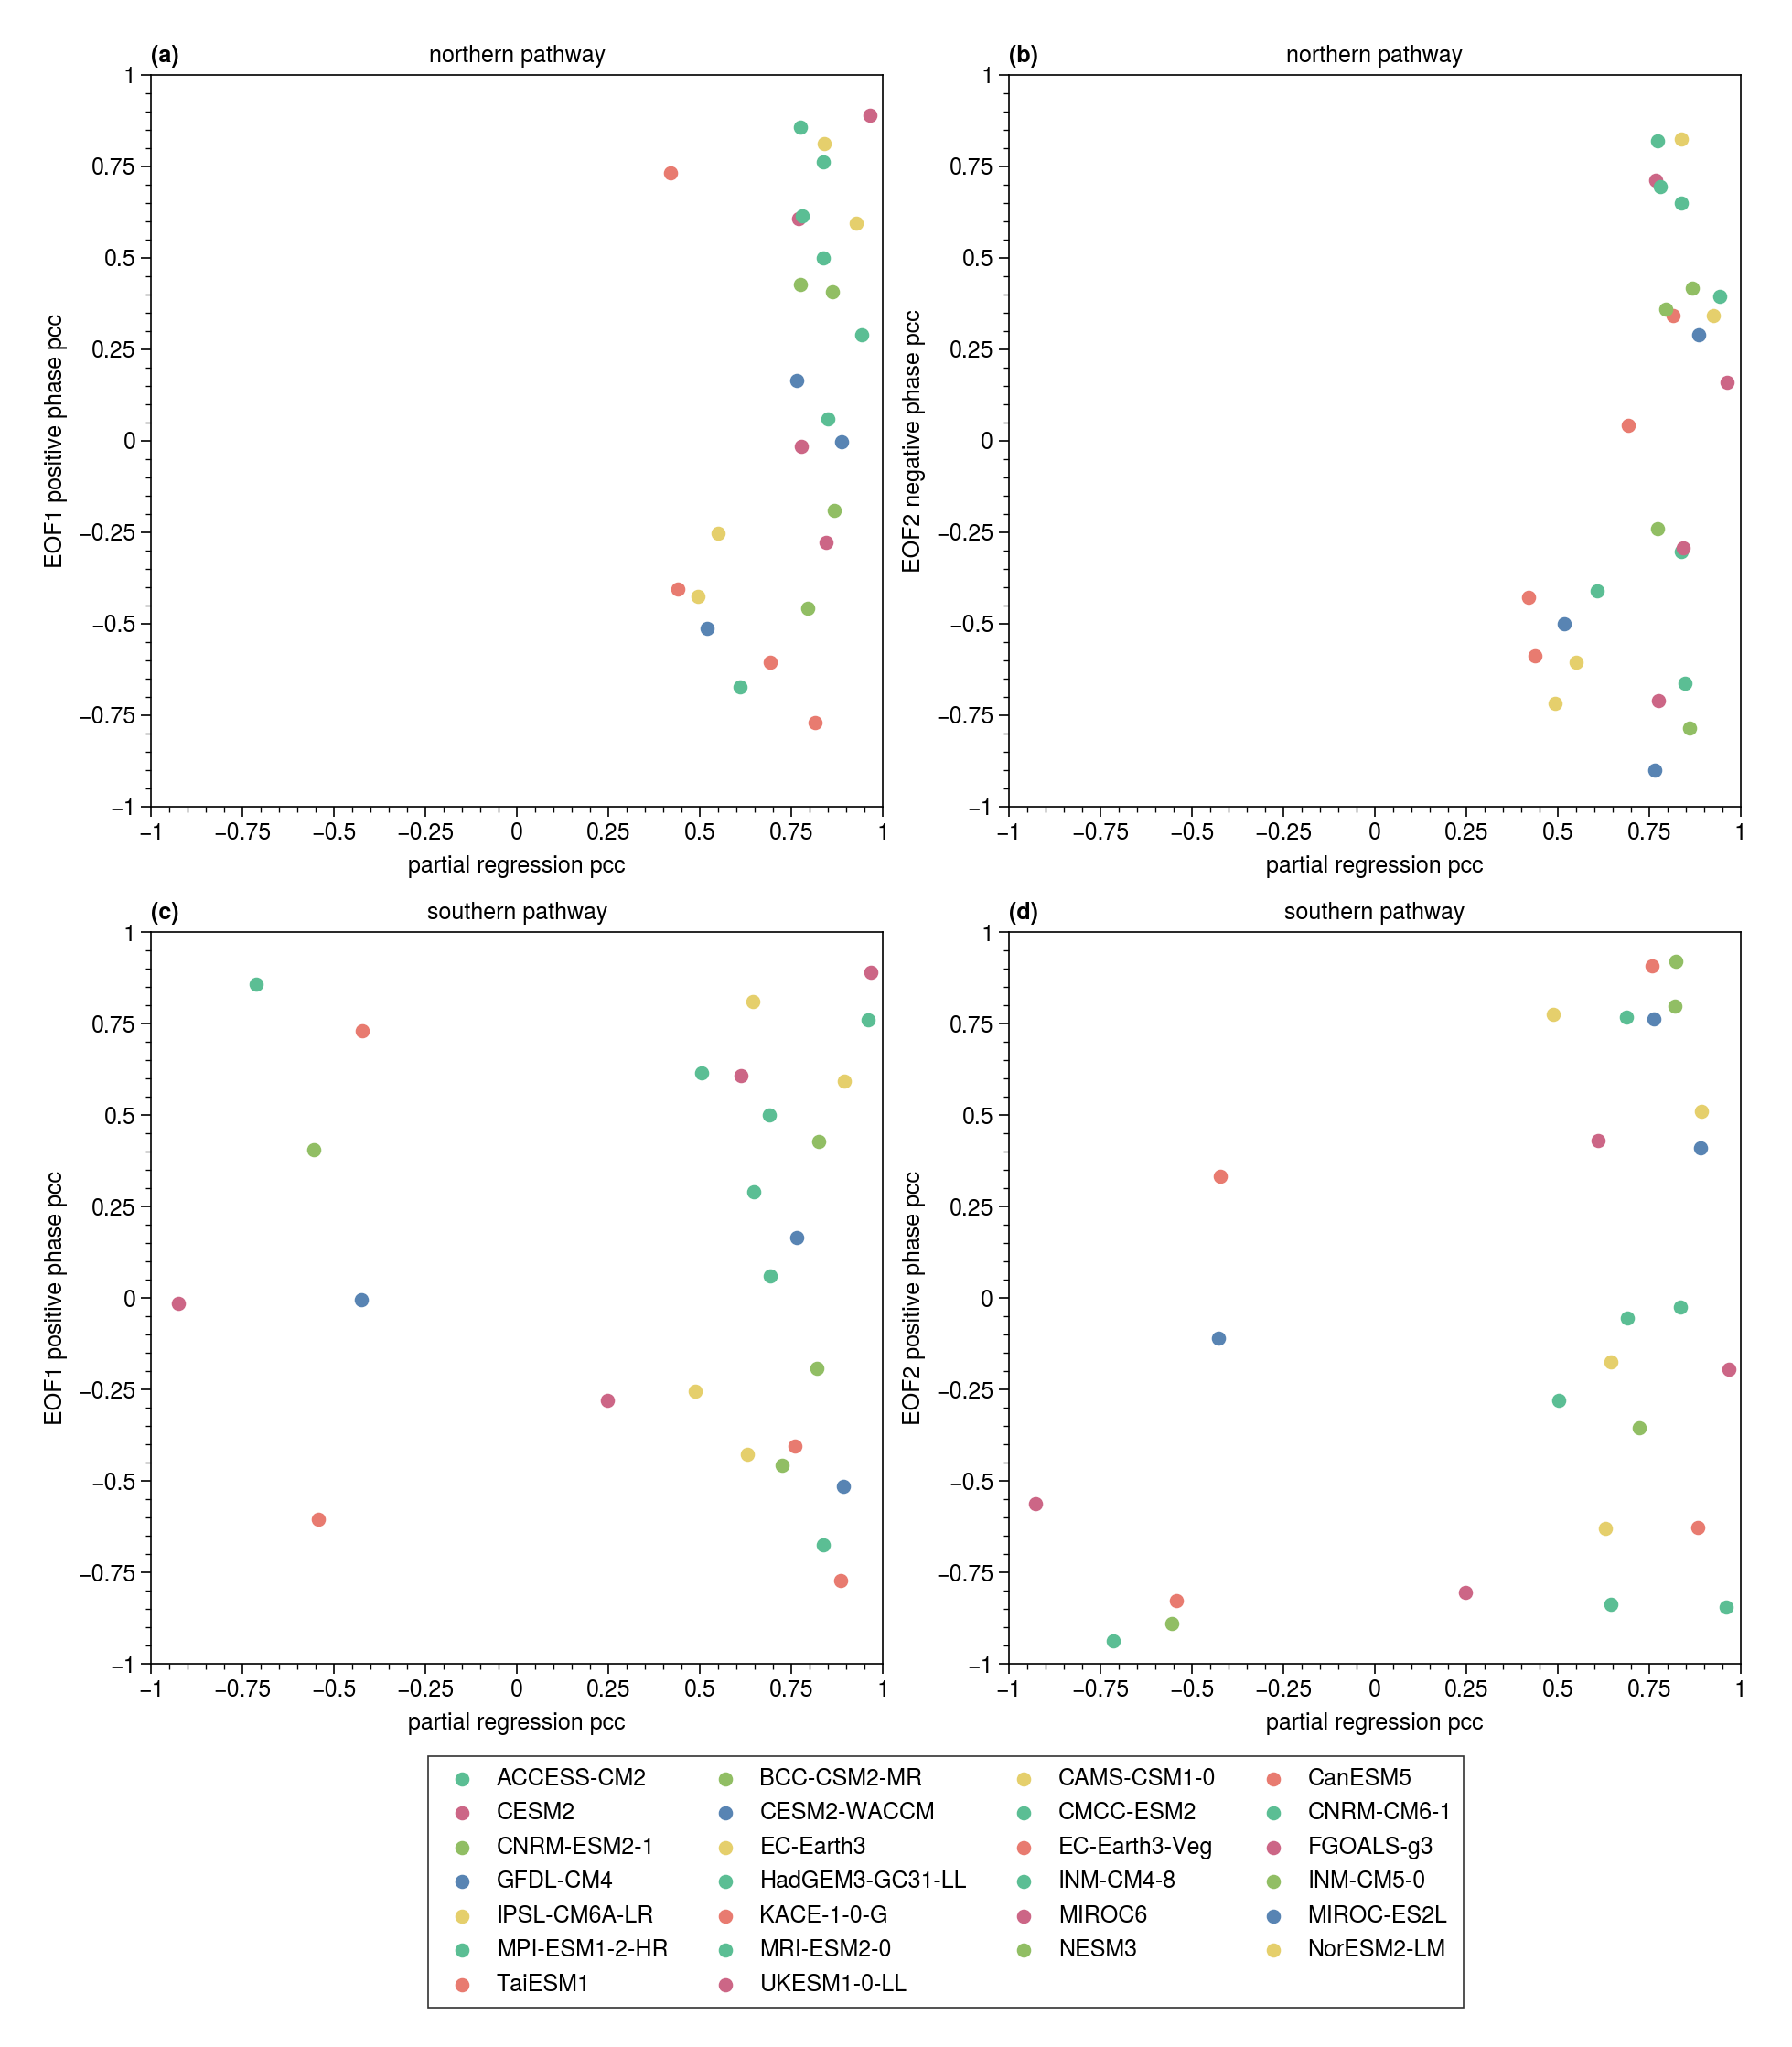

In [105]:
fig_pcc = pplt.figure(span=False, share=False, refheight=4.0, refwidth=4.0, wspace=5.5, hspace=5.5, outerpad=2.0)
axs = fig_pcc.subplots(ncols=2, nrows=2)
# cycle = pplt.Cycle('blues', 'acton', 'oranges', 'greens', 8, left=0.5)
cycle = pplt.Cycle("Qual1", 7)
hs = []
for num_models, mod in enumerate(models.data):
    h = axs[0].scatter(IndR_200hgt_pcc[num_models], IndR_EOF1_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[1].scatter(IndR_200hgt_pcc[num_models], IndR_EOF2_neg_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[2].scatter(IndR_850hgt_pcc[num_models], IndR_EOF1_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[3].scatter(IndR_850hgt_pcc[num_models], IndR_EOF2_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    hs.append(h)
# xyregress = stats.linregress(IndR_ssp585_p3_WNPhigh_regress[2].sel(models=gmodels).data,IndR_ssp585_p3_EAhigh_regress[2].sel(models=gmodels).data)
# axs[0].line(np.linspace(-0.70,0), xyregress[0]*np.linspace(-0.70,0)+xyregress[1],zorder=0.8,color="sky blue")
axs.format(xlim=(-1,1), ylim=(-1,1))
axs[0].format(title="northern pathway", xlabel="partial regression pcc", ylabel="EOF1 positive phase pcc")
axs[1].format(title="northern pathway", xlabel="partial regression pcc", ylabel="EOF2 negative phase pcc")
axs[2].format(title="southern pathway", xlabel="partial regression pcc", ylabel="EOF1 positive phase pcc")
axs[3].format(title="southern pathway", xlabel="partial regression pcc", ylabel="EOF2 positive phase pcc")

fig_pcc.legend(hs, ncols=4, loc="b")
fig_pcc.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False})

In [106]:
stats.linregress(np.array(IndR_850hgt_pcc), np.array(IndR_EOF1_pos_pcc))

LinregressResult(slope=-0.07790851648992689, intercept=0.1527180165353185, rvalue=-0.08663515763492216, pvalue=0.6738856786961755, stderr=0.18287282141777148, intercept_stderr=0.1312979657627043)

### fig. 6 同期JJA/前冬DJF海温与北部路径pcc

In [ ]:
fig_pcc_northern_pathway = pplt.figure(span=False, share=False, refheight=4.0, refwidth=4.0, wspace=5.5, hspace=5.5, outerpad=2.0)
axs = fig_pcc_northern_pathway.subplots(ncols=3, nrows=2)
cycle = pplt.Cycle('blues', 'acton', 'oranges', 'greens', 28, left=0.5)
# cycle = pplt.Cycle("Qual1", 27)
hs = []
for num_models, mod in enumerate(models.data):
    h = axs[0].scatter(nino34JJA_NSASMR_corr.data[num_models], IndR_200hgt_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[1].scatter(nino34JJA_NSASMR_corr.data[num_models], IndR_EOF1_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[2].scatter(nino34JJA_NSASMR_corr.data[num_models], IndR_EOF2_neg_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[3].scatter(nino34DJF_NSASMR_corr.data[num_models], IndR_200hgt_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[4].scatter(nino34DJF_NSASMR_corr.data[num_models], IndR_EOF1_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[5].scatter(nino34DJF_NSASMR_corr.data[num_models], IndR_EOF2_neg_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    # axs[6].scatter(nino34JJA_SSASMR_corr.data[num_models], IndR_200hgt_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    # axs[7].scatter(nino34JJA_SSASMR_corr.data[num_models], IndR_EOF1_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    # axs[8].scatter(nino34JJA_SSASMR_corr.data[num_models], IndR_EOF2_neg_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    # axs[9].scatter(nino34DJF_SSASMR_corr.data[num_models], IndR_200hgt_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    # axs[10].scatter(nino34DJF_SSASMR_corr.data[num_models], IndR_EOF1_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    # axs[11].scatter(nino34DJF_SSASMR_corr.data[num_models], IndR_EOF2_neg_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    hs.append(h)
# xyregress = stats.linregress(IndR_ssp585_p3_WNPhigh_regress[2].sel(models=gmodels).data,IndR_ssp585_p3_EAhigh_regress[2].sel(models=gmodels).data)
# axs[0].line(np.linspace(-0.70,0), xyregress[0]*np.linspace(-0.70,0)+xyregress[1],zorder=0.8,color="sky blue")
axs.format(xlim=(-1,1), ylim=(-1,1))
axs[0].format(xlabel="corr(NSASMR, JJA Nino3.4)", ylabel="partial regression pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_200hgt_pcc), nino34JJA_NSASMR_corr.data)[2]))
axs[1].format(xlabel="corr(NSASMR, JJA Nino3.4)", ylabel="EOF1 positive phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34JJA_NSASMR_corr.data)[2]))
axs[2].format(xlabel="corr(NSASMR, JJA Nino3.4)", ylabel="EOF2 negative phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF2_neg_pcc), nino34JJA_NSASMR_corr.data)[2]))
axs[3].format(xlabel="corr(NSASMR, DJF Nino3.4)", ylabel="partial regression pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_200hgt_pcc), nino34DJF_NSASMR_corr.data)[2]))
axs[4].format(xlabel="corr(NSASMR, DJF Nino3.4)", ylabel="EOF1 positive phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34DJF_NSASMR_corr.data)[2]))
axs[5].format(xlabel="corr(NSASMR, DJF Nino3.4)", ylabel="EOF2 negative phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF2_neg_pcc), nino34DJF_NSASMR_corr.data)[2]))
# axs[6].format(xlabel="corr(SSASMR, JJA Nino3.4)", ylabel="partial regression pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_200hgt_pcc), nino34JJA_SSASMR_corr.data)[2]))
# axs[7].format(xlabel="corr(SSASMR, JJA Nino3.4)", ylabel="EOF1 positive phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34JJA_SSASMR_corr.data)[2]))
# axs[8].format(xlabel="corr(SSASMR, JJA Nino3.4)", ylabel="EOF2 negative phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF2_neg_pcc), nino34JJA_SSASMR_corr.data)[2]))
# axs[9].format(xlabel="corr(SSASMR, DJF Nino3.4)", ylabel="partial regression pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_200hgt_pcc), nino34DJF_SSASMR_corr.data)[2]))
# axs[10].format(xlabel="corr(SSASMR, DJF Nino3.4)", ylabel="EOF1 positive phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34DJF_SSASMR_corr.data)[2]))
# axs[11].format(xlabel="corr(SSASMR, DJF Nino3.4)", ylabel="EOF2 negative phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF2_neg_pcc), nino34DJF_SSASMR_corr.data)[2]))

fig_pcc_northern_pathway.legend(hs, ncols=4, loc="b")
fig_pcc_northern_pathway.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False}, suptitle="northern pathway")

In [104]:
print(stats.linregress(np.array(IndR_200hgt_pcc), nino34JJA_NSASMR_corr.data))
print(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34JJA_NSASMR_corr.data))
print(stats.linregress(np.array(IndR_EOF2_neg_pcc), nino34JJA_NSASMR_corr.data))
print(stats.linregress(np.array(IndR_200hgt_pcc), nino34DJF_NSASMR_corr.data))
print(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34DJF_NSASMR_corr.data))
print(stats.linregress(np.array(IndR_EOF2_neg_pcc), nino34DJF_NSASMR_corr.data))

LinregressResult(slope=0.1767796051193697, intercept=-0.5376410352085563, rvalue=0.178635538191053, pvalue=0.3825965246324896, stderr=0.19875423710031392, intercept_stderr=0.15298655463379254)
LinregressResult(slope=0.07130888902852875, intercept=-0.41279213615747773, rvalue=0.24958449817307882, pvalue=0.2188392631774131, stderr=0.05647472889865258, intercept_stderr=0.03038749215037905)
LinregressResult(slope=0.03320160273749669, intercept=-0.40281777126080537, rvalue=0.12261373241518658, pvalue=0.550694338323999, stderr=0.054856097310308626, intercept_stderr=0.03044742859368047)
LinregressResult(slope=0.3849401602689982, intercept=-0.47487481035715867, rvalue=0.2710893483042264, pvalue=0.18039109241047185, stderr=0.27899751587109795, intercept_stderr=0.21475199385542412)
LinregressResult(slope=0.09305961903557741, intercept=-0.19554244905414417, rvalue=0.22699627735829414, pvalue=0.2647781311731152, stderr=0.0814984463626252, intercept_stderr=0.0438520635230787)
LinregressResult(slope

### fig. 7 同期JJA/前冬DJF海温与南部路径PCC

In [ ]:
fig_pcc_southern_pathway = pplt.figure(span=False, share=False, refheight=4.0, refwidth=4.0, wspace=5.5, hspace=5.5, outerpad=2.0)
axs = fig_pcc_southern_pathway.subplots(ncols=3, nrows=2)
cycle = pplt.Cycle('blues', 'acton', 'oranges', 'greens', 28, left=0.5)
# cycle = pplt.Cycle("Qual1", 7)
hs = []
for num_models, mod in enumerate(models.data):
    h = axs[0].scatter(nino34JJA_SSASMR_corr.data[num_models], IndR_850hgt_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[1].scatter(nino34JJA_SSASMR_corr.data[num_models], IndR_EOF1_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[2].scatter(nino34JJA_SSASMR_corr.data[num_models], IndR_EOF2_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[3].scatter(nino34DJF_SSASMR_corr.data[num_models], IndR_850hgt_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[4].scatter(nino34DJF_SSASMR_corr.data[num_models], IndR_EOF1_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    axs[5].scatter(nino34DJF_SSASMR_corr.data[num_models], IndR_EOF2_pos_pcc[num_models], cycle=cycle, legend_kw={"ncols":4}, labels=mod, marker=".", markersize=100)
    hs.append(h)
# xyregress = stats.linregress(IndR_ssp585_p3_WNPhigh_regress[2].sel(models=gmodels).data,IndR_ssp585_p3_EAhigh_regress[2].sel(models=gmodels).data)
# axs[0].line(np.linspace(-0.70,0), xyregress[0]*np.linspace(-0.70,0)+xyregress[1],zorder=0.8,color="sky blue")
axs.format(xlim=(-1,1), ylim=(-1,1))
axs[0].format(xlabel="corr(SSASMR, JJA Nino3.4)", ylabel="partial regression pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_850hgt_pcc), nino34JJA_SSASMR_corr.data)[2]))
axs[1].format(xlabel="corr(SSASMR, JJA Nino3.4)", ylabel="EOF1 positive phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34JJA_SSASMR_corr.data)[2]))
axs[2].format(xlabel="corr(SSASMR, JJA Nino3.4)", ylabel="EOF2 positive phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF2_pos_pcc), nino34JJA_SSASMR_corr.data)[2]))
axs[3].format(xlabel="corr(SSASMR, DJF Nino3.4)", ylabel="partial regression pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_850hgt_pcc), nino34DJF_SSASMR_corr.data)[2]))
axs[4].format(xlabel="corr(SSASMR, DJF Nino3.4)", ylabel="EOF1 positive phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34DJF_SSASMR_corr.data)[2]))
axs[5].format(xlabel="corr(SSASMR, DJF Nino3.4)", ylabel="EOF2 positive phase pcc", rtitle="r = {}".format(stats.linregress(np.array(IndR_EOF2_pos_pcc), nino34DJF_SSASMR_corr.data)[2]))

fig_pcc_southern_pathway.legend(hs, ncols=4, loc="b")
fig_pcc_southern_pathway.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False}, suptitle="southern pathway")

In [112]:
print(stats.linregress(np.array(IndR_850hgt_pcc), nino34JJA_SSASMR_corr.data))
print(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34JJA_SSASMR_corr.data))
print(stats.linregress(np.array(IndR_EOF2_pos_pcc), nino34JJA_SSASMR_corr.data))
print(stats.linregress(np.array(IndR_850hgt_pcc), nino34DJF_SSASMR_corr.data))
print(stats.linregress(np.array(IndR_EOF1_pos_pcc), nino34DJF_SSASMR_corr.data))
print(stats.linregress(np.array(IndR_EOF2_pos_pcc), nino34DJF_SSASMR_corr.data))

LinregressResult(slope=-0.09585148862989112, intercept=-0.1638922451123774, rvalue=-0.2338482422632335, pvalue=0.2502331200110009, stderr=0.08134809851859695, intercept_stderr=0.05840583511179907)
LinregressResult(slope=0.08312534623887634, intercept=-0.2140083205520591, rvalue=0.18237255385242515, pvalue=0.3725549144130529, stderr=0.09147939154745677, intercept_stderr=0.04922253451731253)
LinregressResult(slope=9.066105152525817e-06, intercept=-0.20402461377166117, rvalue=2.4121871188701737e-05, pvalue=0.9999066887341972, stderr=0.0767192126111068, intercept_stderr=0.049008237927278854)
LinregressResult(slope=0.04601554475986995, intercept=0.017181198582018498, rvalue=0.12831966840292258, pvalue=0.5321573134000076, stderr=0.07259394883720573, intercept_stderr=0.05212058158840593)
LinregressResult(slope=0.09784963307696816, intercept=0.02469632477626263, rvalue=0.245379697683956, pvalue=0.2269551037270949, stderr=0.07890964452154188, intercept_stderr=0.042459100738503334)
LinregressRes